<a href="https://colab.research.google.com/github/GustavoDare/Disciplina_IA_UFSCar/blob/main/Notebook_AM_Supervisionado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade Prática 3 - Aprendizado de Máquina Supervisionado
### Discentes e RAs:
<pre>
Gustavo Borguetti Daré          818723  
Leonardo Shoji Ishiy            823830
</pre>

Este trabalho consiste na execução e validação do algoritmo de aprendizado supervisionado para classificação (árvore de decisão) estudado na disciplina, com o uso de classes e funções disponíveis em bibliotecas Python e descritas neste documento.   

O conjunto de dado foi selecionado no repositório público UCI
(http://archive.ics.uci.edu/ml/) no seguinte link https://archive.ics.uci.edu/dataset/53/iris.

As etapas seguintes etapas foram executadas e relatadas:

1) Selecionar conjunto de dados adequado para problemas de classificação (conjunto com classes nominais) e ler o conjunto de dados no formato .csv com a função read.csv(...) (biblioteca Pandas);

2) Separar o conjunto de dados em matriz de atributos (X) e vetor de classe (y).  

3) Transformar os atributos nominais em binários (se existirem), já que a implementação de Árvore de decisão do scikit-learn não aceita atributos categóricos, usando a classe OneHotEnconder do módulo sklearn.preprocessing ou usando a função get_dummies(...) da biblioteca Pandas;

4) Dividir o conjunto de dados em um conjunto de treinamento e um conjunto de teste usando a função train_test_split do módulo sklearn.model_selection;

5) Aplicar o algoritmo de indução de árvore de decisão no conjunto de treinamento usando a função fit(...) da classe DecisionTreeClassifier do módulo sklearn.tree, com o atributo criterion=’entropy’;

6) Gerar a figura da árvore de decisão gerada com a função plot_tree(...) do módulo sklearn.tree;

7) Fazer a classificação dos dados de teste usando a função predict(...) da classe DecisionTreeClassifier do módulo sklearn.tree;

8) Fazer a avaliação do modelo gerado usando os dados de teste e mostrar os resultados incluindo matriz de confusão, acurácia, precisão, revocação e medida-F, possivelmente usando funções disponíveis no sklearn para cada medida individualmente. Não é permitido usar a função classification_report(...) do modulo sklearn.metrics.

In [51]:
# Importação das bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

In [61]:
# 1) Leitura do conjunto de dados
iris = pd.read_csv('https://raw.githubusercontent.com/GustavoDare/Disciplina_IA_UFSCar/refs/heads/main/Trabalho%203%20-%20AM%20Supervisionado/iris/iris.data')

In [53]:
# 2) Separar o conjunto de dados em matriz de atributos (X) e vetor de classes (y)
X = iris.drop(columns=['class'])
y = iris['class']

In [54]:
# 3) Transformar atributos nominais em binários (não necessário para o conjunto de dados iris)
X = pd.get_dummies(X)

In [55]:
# 4) Dividir o conjunto de dados em um conjunto de treinamento e um conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=10)

In [56]:
# 5) Aplicar o algoritmo de indução de árvore de decisão no conjunto de treinamento
clf = DecisionTreeClassifier(criterion='entropy', random_state=10)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=10)

[Text(0.375, 0.9, 'width.1 <= 0.75\nentropy = 1.578\nsamples = 90\nvalue = [32.0, 26.0, 32.0]\nclass = Iris-setosa'),
 Text(0.25, 0.7, 'entropy = 0.0\nsamples = 32\nvalue = [32, 0, 0]\nclass = Iris-setosa'),
 Text(0.3125, 0.8, 'True  '),
 Text(0.5, 0.7, 'length.1 <= 4.75\nentropy = 0.992\nsamples = 58\nvalue = [0, 26, 32]\nclass = Iris-virginica'),
 Text(0.4375, 0.8, '  False'),
 Text(0.25, 0.5, 'width.1 <= 1.6\nentropy = 0.242\nsamples = 25\nvalue = [0, 24, 1]\nclass = Iris-versicolor'),
 Text(0.125, 0.3, 'entropy = 0.0\nsamples = 24\nvalue = [0, 24, 0]\nclass = Iris-versicolor'),
 Text(0.375, 0.3, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Iris-virginica'),
 Text(0.75, 0.5, 'width.1 <= 1.75\nentropy = 0.33\nsamples = 33\nvalue = [0, 2, 31]\nclass = Iris-virginica'),
 Text(0.625, 0.3, 'width.1 <= 1.55\nentropy = 0.971\nsamples = 5\nvalue = [0, 2, 3]\nclass = Iris-virginica'),
 Text(0.5, 0.1, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = Iris-virginica'),
 Text(0

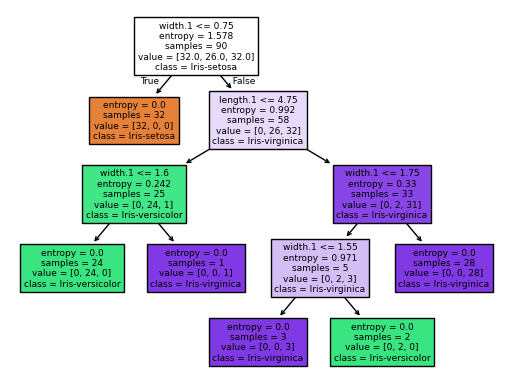

In [57]:
# 6) Gerar a figura da árvore de decisão
plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True)

In [58]:
# 7) Fazer a classificação dos dados de teste
y_predict = clf.predict(X_test)

In [59]:
# 8) Fazer a avaliação do modelo gerado
conf_matrix = confusion_matrix(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
precision = precision_score(y_test, y_predict, average='weighted')
recall = recall_score(y_test, y_predict, average='weighted')
f1 = f1_score(y_test, y_predict, average='weighted')

print("Matriz de Confusão:\n", conf_matrix)
print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Revocação: {recall:.4f}")
print(f"Medida-F: {f1:.4f}")

Matriz de Confusão:
 [[18  0  0]
 [ 0 20  4]
 [ 0  1 17]]
Acurácia: 0.9167
Precisão: 0.9238
Revocação: 0.9167
Medida-F: 0.9171
